# I. Data

### This dataset is obtained from Kaggle dataset collections and was originally from the open-source Global Terrorism Database (GTD). It includes information on terrorist attacks around the world from 1970 through 2017, and contains 135 labeled data. The database is currently maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

### There are more and more terrorist attacks in recent years around the World. If data scientists can utilize machine learning algorithms to predict the next terrorist attacks before they actually happen, that will save a lot of lives. General populations can use the statistical result when planning their trips to different locations around the World. Government can also use the results to forcast or alert citizens about the possibilities of future terrorist attacks.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# Read the dataset
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)
df.head(1)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


In [48]:
# Examine the size of the dataset
df.shape

(181691, 135)

### This dataset contains many information about historical terrorist attacks. There are 135 data field in total. We will only extract the data field that will be used to answer our three main analytical questions.

In [49]:
# Select the data field we need for this analysis
df = df[['iyear','imonth','iday','country_txt','region_txt',
         'suicide','attacktype1_txt','targtype1_txt','gname','provstate',
         'city','natlty1_txt','latitude','longitude'
        ]]

### The dataset contains non-typical label names. We will rename those fields in our Pandas data frame.

In [50]:
# Rename the name of the selected columns 
df.rename(columns={
    'iyear':'Year', 'imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
    'suicide':'Suicide', 'attacktype1_txt':'Attack', 'targtype1_txt':'Target', 'gname':'Group','provstate':'State',
    'city':'City', 'natlty1_txt':'Nationality', 'latitude':'Latitude', 'longitude':'Longitude'
},inplace=True)

In [51]:
# Check the empty data amount in the newly created data frame
df.isnull().sum().sort_values()

Year              0
Month             0
Day               0
Country           0
Region            0
Suicide           0
Attack            0
Target            0
Group             0
State           421
City            434
Nationality    1559
Latitude       4556
Longitude      4557
dtype: int64

In [52]:
df.dropna(inplace=True)

# II. Analytic Questions

## 1. Does terrorist attacks increase over the years from 1970 to 2017?

Text(0,0.5,'Terrorist Attack Counts')

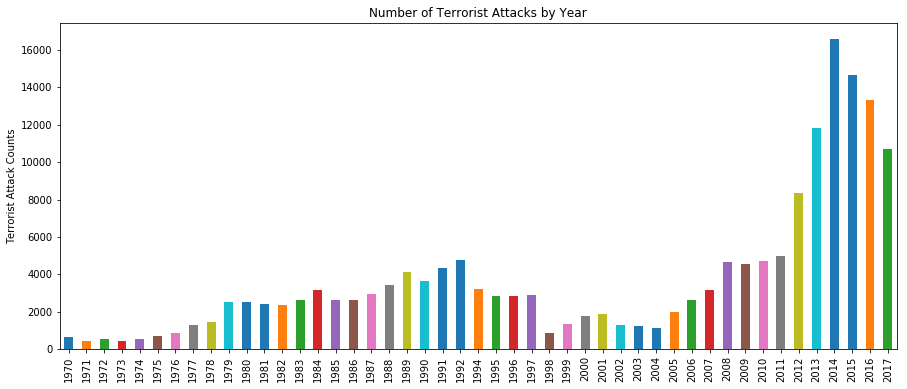

In [53]:
df['Year'].value_counts(sort=False).plot(kind='bar',figsize=(15,6))
plt.title('Number of Terrorist Attacks by Year')
plt.ylabel('Terrorist Attack Counts')

### The terrorist attacks increase over the years from 1970 to 2017. The number of terrorist attacks in recent 6 years have way more than those years before 2011. The attack incidient number reaches to the maximum at year 2014 and slowly drops down over the years to 2017. This decrease might be due to reinforcement of intelligence systems around the World.

### Let's see if the US follows the same trend as the total number of terrorist attacks around the World.

In [54]:
df_USA = df[df.Country == 'United States']

Text(0,0.5,'Attacks Count')

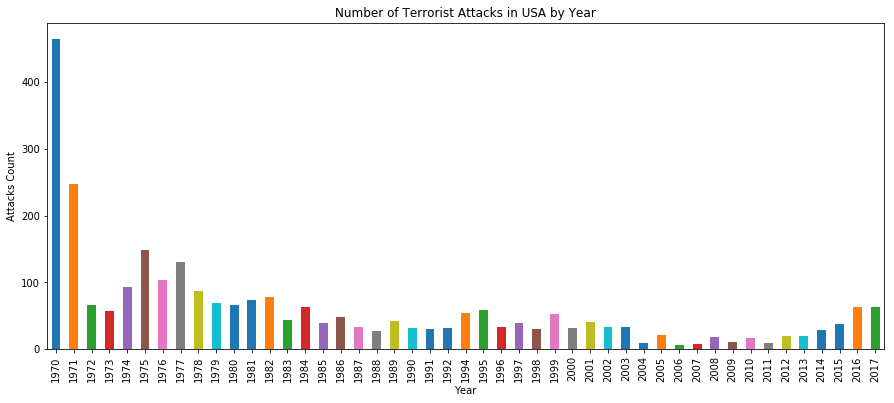

In [55]:
df_USA['Year'].value_counts(sort=False).sort_index().plot(kind='bar',figsize=(15,6))
plt.title('Number of Terrorist Attacks in USA by Year')
plt.xlabel('Year')
plt.ylabel('Attacks Count')

### USA has dramatically reduced the number of terrorist attacks over the years since 1970. Year 1970 and 1971 has way more terrorist incidence than the years after 1972. The 1970s were a tumultuous time in the US. There were numerous Anti- Vietnam War protests, and Women, African Americans, Native Americans, gays and lesbians continued to fight for their equality. This might be the cause of such high number of terrorsit attacks in year 1970 and 1971. We can verify this assumption by validating if most of the terrorist attacks in the US for year 1970 and 1971 are from inland. 

Text(0,0.5,'Attacks Count')

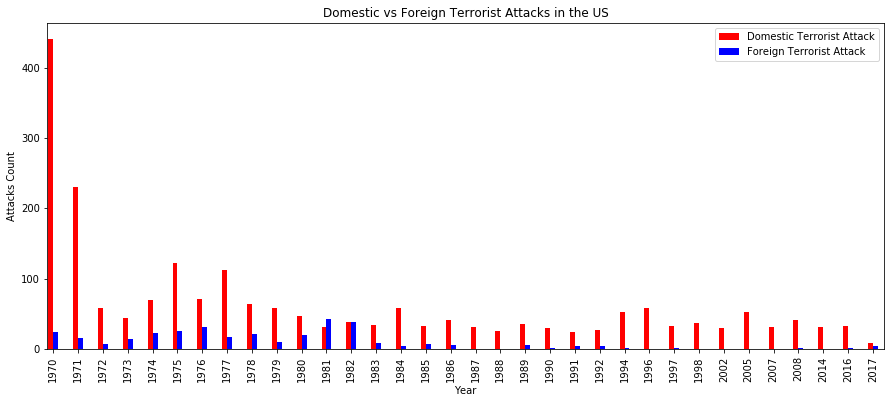

In [57]:
df_USA['Year'][(df_USA.Country == df_USA.Nationality)].value_counts().sort_index().plot(
    kind='bar', figsize=(15,6), color='red', label="Domestic Terrorist Attack", width=0.2,position=1)
df_USA['Year'][(df_USA.Country != df_USA.Nationality)].value_counts().sort_index().plot(
    kind='bar', figsize=(15,6), color='blue', label="Foreign Terrorist Attack",width=0.2,position=0)
plt.legend()
plt.title('Domestic vs Foreign Terrorist Attacks in the US')
plt.xlabel('Year')
plt.ylabel('Attacks Count')

### Look into all the terrorist attacks happened in the United States between 1970 and 2017. If the terrorist' nationality is the United States, we can catogorize this attack as domestic. and if his/her nationality is not the United States, we can categorize this attack as foreign. From the bar chart above, we can tell the main source of terrorist attacks happened in the US is from inland. For the extemely high number of attacks in year 1970 and 1971, we can also conclude that the main reason is due to the domestic protest and fighting for human right.

## 2. Does geographical location play a role in terrorist attacks between 1970 and 2017?

Text(0,0.5,'Attacks Count')

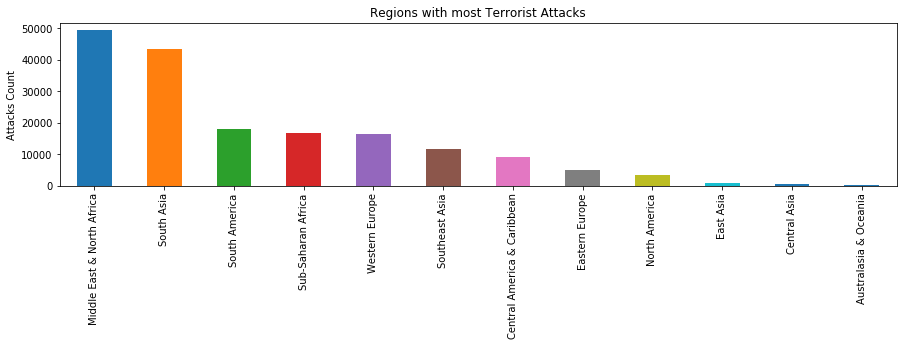

In [58]:
df['Region'].value_counts(sort=True).plot(kind='bar',figsize=(15,3))
plt.title('Regions with most Terrorist Attacks')
plt.ylabel('Attacks Count')

### Two regions - i.e., 'Middle East & North Africa' and 'South Asia' have had the most terrorist attacks compared to the rest of the World.

Text(0,0.5,'Attacks Count')

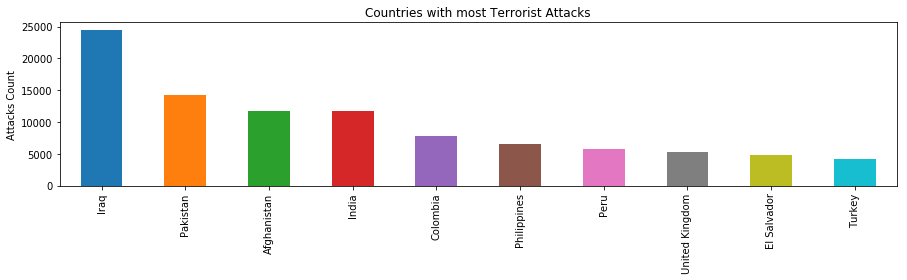

In [59]:
df['Country'].value_counts(sort=True).head(10).plot(kind='bar',figsize=(15,3))
plt.title('Countries with most Terrorist Attacks')
plt.ylabel('Attacks Count')

### Not supringly, the top four countries which have the most terroist attacks all reside in the top two regions.

## 3. Does the seasons affect the occurance of terrorist attacks between 1970 and 2017?

### Studies have shown that hot temperatures make people uncomforable and irriated, which makes them more aggressive. Let's see if this statement is applicable to our dataset analysis. Since northern and southen hemisphere countires have different seasons  during the year, we will first categorize each terrorist attack as northern and southern hemisphere location based on their latitude, and then create a "Season" data field based on each specific month.

In [60]:
df.drop(df[df.Month==0].index,inplace=True)

In [61]:
df['Season']=''

In [62]:
df.loc[(df.Latitude > 0) & ((df.Month==9) | (df.Month==10) | (df.Month==11)), 'Season'] = 'Fall'
df.loc[(df.Latitude > 0) & ((df.Month==12) | (df.Month==1) | (df.Month==2)), 'Season'] = 'Winter'
df.loc[(df.Latitude > 0) & ((df.Month==3) | (df.Month==4) | (df.Month==5)), 'Season'] = 'Spring'
df.loc[(df.Latitude > 0) & ((df.Month==6) | (df.Month==7) | (df.Month==8)), 'Season'] = 'Summer'

In [63]:
df.loc[(df.Latitude < 0) & ((df.Month==9) | (df.Month==10) | (df.Month==11)), 'Season'] = 'Spring'
df.loc[(df.Latitude < 0) & ((df.Month==12) | (df.Month==1) | (df.Month==2)), 'Season'] = 'Summer'
df.loc[(df.Latitude < 0) & ((df.Month==3) | (df.Month==4) | (df.Month==5)), 'Season'] = 'Fall'
df.loc[(df.Latitude < 0) & ((df.Month==6) | (df.Month==7) | (df.Month==8)), 'Season'] = 'Winter'

Text(0,0.5,'Attacks Count')

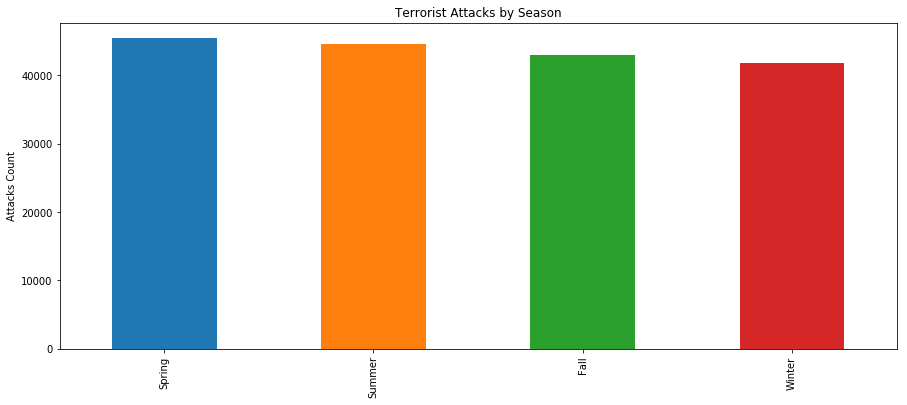

In [64]:
df['Season'].value_counts().plot(kind='bar',figsize=(15,6))
plt.title('Terrorist Attacks by Season')
plt.ylabel('Attacks Count')

### Springly, seasons do not play a role in the likelihood of terrorist attacks as we can tell from the above bar plot.

# III. Further Research

## This analysis only touches the surface of the dataset. There is not any data science algorithm which was used to analyze the problems. We did not explore all the dataset in this report. There are some more questions that need to be answered with the use of machine learning algorithm.  For example, Where will the next terrorist attack be at?  Which social groups will the government need to look out for the possible terrorist attack? Data science techniques can be used to analyze this dataset and answer those questions.